# EasyVisa Project<a href="#EasyVisa-Project" class="anchor-link">¶</a>

## Context:<a href="#Context:" class="anchor-link">¶</a>

Business communities in the United States are facing high demand for
human resources, but one of the constant challenges is identifying and
attracting the right talent, which is perhaps the most important element
in remaining competitive. Companies in the United States look for
hard-working, talented, and qualified individuals both locally as well
as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign
workers to come to the United States to work on either a temporary or
permanent basis. The act also protects US workers against adverse
impacts on their wages or working conditions by ensuring US employers'
compliance with statutory requirements when they hire foreign workers to
fill workforce shortages. The immigration programs are administered by
the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to
bring foreign workers into the United States and grants certifications
in those cases where employers can demonstrate that there are not
sufficient US workers available to perform the work at wages that meet
or exceed the wage paid for the occupation in the area of intended
employment.

## Objective:<a href="#Objective:" class="anchor-link">¶</a>

In FY 2016, the OFLC processed 775,979 employer applications for
1,699,957 positions for temporary and permanent labor certifications.
This was a nine percent increase in the overall number of processed
applications from the previous year. The process of reviewing every case
is becoming a tedious task as the number of applicants is increasing
every year.

The increasing number of applicants every year calls for a Machine
Learning based solution that can help in shortlisting the candidates
having higher chances of VISA approval. OFLC has hired your firm
EasyVisa for data-driven solutions. You as a data scientist have to
analyze the data provided and, with the help of a classification model:

-   Facilitate the process of visa approvals.
-   Recommend a suitable profile for the applicants for whom the visa
    should be certified or denied based on the drivers that
    significantly influence the case status.

## Data Description<a href="#Data-Description" class="anchor-link">¶</a>

The data contains the different attributes of the employee and the
employer. The detailed data dictionary is given below.

-   case_id: ID of each visa application
-   continent: Information of continent the employee
-   education_of_employee: Information of education of the employee
-   has_job_experience: Does the employee has any job experience? Y=
    Yes; N = No
-   requires_job_training: Does the employee require any job training? Y
    = Yes; N = No
-   no_of_employees: Number of employees in the employer's company
-   yr_of_estab: Year in which the employer's company was established
-   region_of_employment: Information of foreign worker's intended
    region of employment in the US.
-   prevailing_wage: Average wage paid to similarly employed workers in
    a specific occupation in the area of intended employment. The
    purpose of the prevailing wage is to ensure that the foreign worker
    is not underpaid compared to other workers offering the same or
    similar service in the same area of employment.
-   unit_of_wage: Unit of prevailing wage. Values include Hourly,
    Weekly, Monthly, and Yearly.
-   full_time_position: Is the position of work full-time? Y = Full Time
    Position; N = Part Time Position
-   case_status: Flag indicating if the Visa was certified or denied

## Importing necessary libraries<a href="#Importing-necessary-libraries" class="anchor-link">¶</a>

In \[1\]:

    # To make the Python code more structured automatically (good coding practice)
    #%load_ext nb_black

    # Library to suppress warnings and deprecation notes
    import warnings

    warnings.filterwarnings("ignore")

    # Libraries to help with reading and manipulating data
    import numpy as np
    import pandas as pd

    # libaries to help with data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Removes the limit for the number of displayed columns
    pd.set_option("display.max_columns", None)
    # Sets the limit for the number of displayed rows
    pd.set_option("display.max_rows", 100)

    # Library to split data
    from sklearn.model_selection import train_test_split

    # Libraries different ensemble classifiers
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
    from xgboost import XGBClassifier

    # Libraries to get different metric scores
    import scipy.stats as stats
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

    # To tune different models
    from sklearn.model_selection import GridSearchCV

## Importing Dataset<a href="#Importing-Dataset" class="anchor-link">¶</a>

In \[2\]:

    visa = pd.read_csv('/content/EasyVisa.csv')

In \[3\]:

    # copying data to another variable to avoid any changes to original data
    data = visa.copy()

## Data Overview<a href="#Data-Overview" class="anchor-link">¶</a>

The initial steps to get an overview of any dataset is to perform a
sanity check by:

-   Observing the first few rows of the dataset, to check whether the
    dataset has been loaded properly or not
-   Getting information about the number of rows and columns in the
    dataset
-   Finding out the data types of the columns to ensure that data is
    stored in the preferred format and the value of each property is as
    expected.
-   Checking the statistical summary of the dataset to get an overview
    of the numerical columns of the data
-   Checking for missing values and duplicate

In \[4\]:

    # The Head() returns the first 5 rows of the dataframe
    data.head()

Out\[4\]:

|  | case_id | continent | education_of_employee | has_job_experience | requires_job_training | no_of_employees | yr_of_estab | region_of_employment | prevailing_wage | unit_of_wage | full_time_position | case_status |
|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 0 | EZYV01 | Asia | High School | N | N | 14513 | 2007 | West | 592.2029 | Hour | Y | Denied |
| 1 | EZYV02 | Asia | Master's | Y | N | 2412 | 2002 | Northeast | 83425.6500 | Year | Y | Certified |
| 2 | EZYV03 | Asia | Bachelor's | N | Y | 44444 | 2008 | West | 122996.8600 | Year | Y | Denied |
| 3 | EZYV04 | Asia | Bachelor's | N | N | 98 | 1897 | West | 83434.0300 | Year | Y | Denied |
| 4 | EZYV05 | Africa | Master's | Y | N | 1082 | 2005 | South | 149907.3900 | Year | Y | Certified |



In \[5\]:

    # The Tail() returns the last 5 rows of the dataframe
    data.tail()

Out\[5\]:

|  | case_id | continent | education_of_employee | has_job_experience | requires_job_training | no_of_employees | yr_of_estab | region_of_employment | prevailing_wage | unit_of_wage | full_time_position | case_status |
|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 25475 | EZYV25476 | Asia | Bachelor's | Y | Y | 2601 | 2008 | South | 77092.57 | Year | Y | Certified |
| 25476 | EZYV25477 | Asia | High School | Y | N | 3274 | 2006 | Northeast | 279174.79 | Year | Y | Certified |
| 25477 | EZYV25478 | Asia | Master's | Y | N | 1121 | 1910 | South | 146298.85 | Year | N | Certified |
| 25478 | EZYV25479 | Asia | Master's | Y | Y | 1918 | 1887 | West | 86154.77 | Year | Y | Certified |
| 25479 | EZYV25480 | Asia | Bachelor's | Y | N | 3195 | 1960 | Midwest | 70876.91 | Year | Y | Certified |



-   The dataset contains different attributes of job employment visa
    applicant details which consist of Case_ID, continent, education
    level, previous job experience, required job training, number of
    Employee, employer year of establishement, US region of employment,
    prevailing wage, unit of wage, employment type whether full time
    position, and visa application case status

In \[6\]:

    # The shape() is used to get the number of rows and columns of the dataset
    data.shape

Out\[6\]:

    (25480, 12)

-   The dataset contains **25480 rows and 12 columns**

In \[7\]:

    # The info() is used to print a concise summary of the Dataset
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 25480 entries, 0 to 25479
    Data columns (total 12 columns):
     #   Column                 Non-Null Count  Dtype  
    ---  ------                 --------------  -----  
     0   case_id                25480 non-null  object 
     1   continent              25480 non-null  object 
     2   education_of_employee  25480 non-null  object 
     3   has_job_experience     25480 non-null  object 
     4   requires_job_training  25480 non-null  object 
     5   no_of_employees        25480 non-null  int64  
     6   yr_of_estab            25480 non-null  int64  
     7   region_of_employment   25480 non-null  object 
     8   prevailing_wage        25480 non-null  float64
     9   unit_of_wage           25480 non-null  object 
     10  full_time_position     25480 non-null  object 
     11  case_status            25480 non-null  object 
    dtypes: float64(1), int64(2), object(9)
    memory usage: 2.3+ MB

-   There are **3 numeric** (*float* and *int* type) and **9
    categorical** (*object* type) columns in the data
-   There are no missing value in the dataset but this will be further
    confirmed using the isnull() method
-   The target variable is case_status, which is of *object* datatype
-   Case_id is assigned for each case by INA which provide no
    information for model building
-   The dataset consumed 2.3+ MB memory usage.

#### We can convert the object type columns to categories.<a href="#We-can-convert-the-object-type-columns-to-categories."
class="anchor-link">¶</a>

`converting "objects" to "category" reduces the data space required to store the dataframe`

In \[8\]:

    cols = data.select_dtypes(['object'])
    cols.columns

Out\[8\]:

    Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
           'requires_job_training', 'region_of_employment', 'unit_of_wage',
           'full_time_position', 'case_status'],
          dtype='object')

In \[9\]:

    for i in cols.columns:
        data[i] = data[i].astype('category')

In \[10\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 25480 entries, 0 to 25479
    Data columns (total 12 columns):
     #   Column                 Non-Null Count  Dtype   
    ---  ------                 --------------  -----   
     0   case_id                25480 non-null  category
     1   continent              25480 non-null  category
     2   education_of_employee  25480 non-null  category
     3   has_job_experience     25480 non-null  category
     4   requires_job_training  25480 non-null  category
     5   no_of_employees        25480 non-null  int64   
     6   yr_of_estab            25480 non-null  int64   
     7   region_of_employment   25480 non-null  category
     8   prevailing_wage        25480 non-null  float64 
     9   unit_of_wage           25480 non-null  category
     10  full_time_position     25480 non-null  category
     11  case_status            25480 non-null  category
    dtypes: category(9), float64(1), int64(2)
    memory usage: 2.0 MB

we can see that the memory usage has decreased from 2.3+ MB to 2.0 MB,
this technique is generally useful for bigger datasets.

In \[11\]:

    # checking missing values across each columns
    data.isnull().sum()

Out\[11\]:

    case_id                  0
    continent                0
    education_of_employee    0
    has_job_experience       0
    requires_job_training    0
    no_of_employees          0
    yr_of_estab              0
    region_of_employment     0
    prevailing_wage          0
    unit_of_wage             0
    full_time_position       0
    case_status              0
    dtype: int64

-   There are no missing value in the dataset

In \[12\]:

    # checking duplicate values across each columns
    data.duplicated().sum()

Out\[12\]:

    0

-   There are no duplicate value in the dataset

### Statistical Summary<a href="#Statistical-Summary" class="anchor-link">¶</a>

In \[13\]:

    data.describe().T

Out\[13\]:

|  | count | mean | std | min | 25% | 50% | 75% | max |
|----|----|----|----|----|----|----|----|----|
| no_of_employees | 25480.0 | 5667.043210 | 22877.928848 | -26.0000 | 1022.00 | 2109.00 | 3504.0000 | 602069.00 |
| yr_of_estab | 25480.0 | 1979.409929 | 42.366929 | 1800.0000 | 1976.00 | 1997.00 | 2005.0000 | 2016.00 |
| prevailing_wage | 25480.0 | 74455.814592 | 52815.942327 | 2.1367 | 34015.48 | 70308.21 | 107735.5125 | 319210.27 |



-   The average and median number of employees in the employer's
    organization are 5667 and 2019 respectively while the minimum number
    is negative which does not appear to be a valid data point
-   There are companies in the dataset with years of establishment from
    1800 to 2016
-   The average and median (~50th percentile) prevailing wage for
    occupation in United States is USD 74,455 and USD 70,308
    respecticvely while the minimum value of USD 2.1367 does not appear
    to be a valid data point. The attribute has to be studied in union
    with unit_of_wage to gather further insight

In \[14\]:

    data.describe(include=['category']).T

Out\[14\]:

|                       | count | unique | top        | freq  |
|-----------------------|-------|--------|------------|-------|
| case_id               | 25480 | 25480  | EZYV01     | 1     |
| continent             | 25480 | 6      | Asia       | 16861 |
| education_of_employee | 25480 | 4      | Bachelor's | 10234 |
| has_job_experience    | 25480 | 2      | Y          | 14802 |
| requires_job_training | 25480 | 2      | N          | 22525 |
| region_of_employment  | 25480 | 5      | Northeast  | 7195  |
| unit_of_wage          | 25480 | 4      | Year       | 22962 |
| full_time_position    | 25480 | 2      | Y          | 22773 |
| case_status           | 25480 | 2      | Certified  | 17018 |



-   The case ID attribute can be dropped as it is a unique ID variable
    and is not expected to add any value to the status of a visa being
    accepted
-   There are 6 continents in the database, with majority of applicants
    from Asia
-   There are 4 different levels of eduction with Bachelor's being the
    highest education degree for majority of applicants
-   Majority of applicants do not require further job training to
    perform the intended occupation in the US
-   There are 5 different regions in the US requiring immigrants due to
    Human Resource shortages, the maximum being in the NorthEast US
    region
-   There are 4 different units of wages with yearly being the most
    common. The prevailing wage and unit of wage may need to be studied
    in union to gather further insight
-   Majority of the occupation with employee shortages are full time
    positions
-   Case status is the attribute of interest (which needs to be
    predicted by our ML model). As per dataset, 66.7% of all applicants
    have a certified visa status and only 33.2% have a denied visa
    status

**Dropping columns which is not adding any information to the
Analysis.**

In \[15\]:

    data.drop(['case_id'],axis=1,inplace=True)

**Let's look at the unique values of all the categories**

In \[16\]:

    cols_cat= data.select_dtypes(['category'])

In \[17\]:

    for i in cols_cat.columns:
        print('Unique values in',i, 'are :')
        print(cols_cat[i].value_counts())
        print('*'*50)

    Unique values in continent are :
    Asia             16861
    Europe            3732
    North America     3292
    South America      852
    Africa             551
    Oceania            192
    Name: continent, dtype: int64
    **************************************************
    Unique values in education_of_employee are :
    Bachelor's     10234
    Master's        9634
    High School     3420
    Doctorate       2192
    Name: education_of_employee, dtype: int64
    **************************************************
    Unique values in has_job_experience are :
    Y    14802
    N    10678
    Name: has_job_experience, dtype: int64
    **************************************************
    Unique values in requires_job_training are :
    N    22525
    Y     2955
    Name: requires_job_training, dtype: int64
    **************************************************
    Unique values in region_of_employment are :
    Northeast    7195
    South        7017
    West         6586
    Midwest      4307
    Island        375
    Name: region_of_employment, dtype: int64
    **************************************************
    Unique values in unit_of_wage are :
    Year     22962
    Hour      2157
    Week       272
    Month       89
    Name: unit_of_wage, dtype: int64
    **************************************************
    Unique values in full_time_position are :
    Y    22773
    N     2707
    Name: full_time_position, dtype: int64
    **************************************************
    Unique values in case_status are :
    Certified    17018
    Denied        8462
    Name: case_status, dtype: int64
    **************************************************

## Exploratory Data Analysis (EDA)<a href="#Exploratory-Data-Analysis-(EDA)" class="anchor-link">¶</a>

-   EDA is an important part of any project involving data.
-   It is important to investigate and understand the data better before
    building a model with it.
-   A few questions have been mentioned below which will help you
    approach the analysis in the right manner and generate insights from
    the data.
-   A thorough analysis of the data, in addition to the questions
    mentioned below, should be done.

**Leading Questions**:

1.  Those with higher education may want to travel abroad for a
    well-paid job. Does education play a role in Visa certification?

2.  How does the visa status vary across different continents?

3.  Experienced professionals might look abroad for opportunities to
    improve their lifestyles and career development. Does work
    experience influence visa status?

4.  In the United States, employees are paid at different intervals.
    Which pay unit is most likely to be certified for a visa?

5.  The US government has established a prevailing wage to protect local
    talent and foreign workers. How does the visa status change with the
    prevailing wage?

### Univariate analysis<a href="#Univariate-analysis" class="anchor-link">¶</a>

In \[18\]:

    # function to plot a boxplot and a histogram along the same scale.


    def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
        """
        Boxplot and histogram combined

        data: dataframe
        feature: dataframe column
        figsize: size of figure (default (15,10))
        kde: whether to show the density curve (default False)
        bins: number of bins for histogram (default None)
        """
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )  # creating the 2 subplots
        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
        )  # boxplot will be created and a star will indicate the mean value of the column
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram

#### Observations on number of employees<a href="#Observations-on-number-of-employees" class="anchor-link">¶</a>

In \[19\]:

    # Removing negative entries for no_of_employees
    data.drop(data[(data["no_of_employees"]<=0)].index, inplace=True)

In \[20\]:

    data.shape

Out\[20\]:

    (25447, 11)

-   This removed thirty-three entries from the dataset

In \[21\]:

    histogram_boxplot(data, "no_of_employees")

![](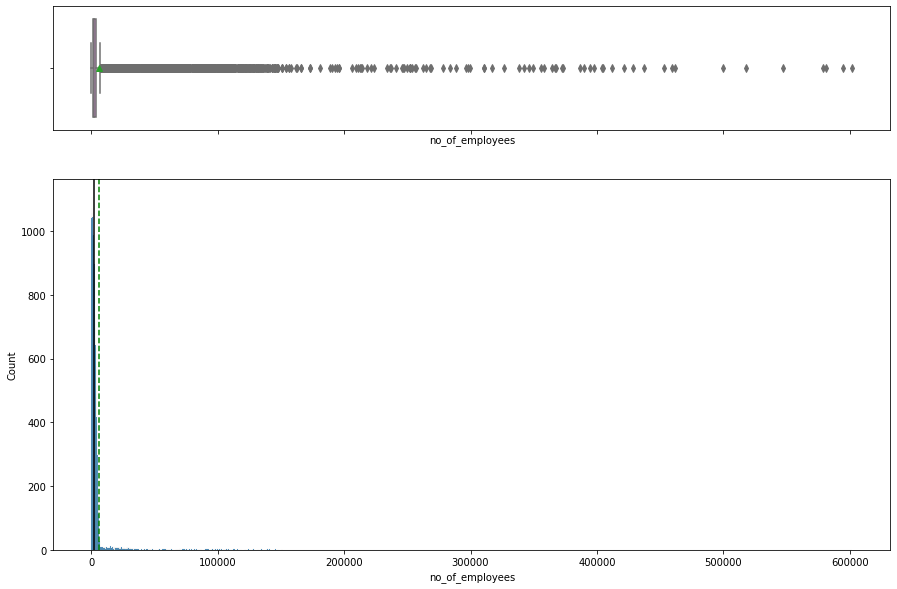%0A)

-   The distribution for number of employees for employers is heavily
    skewed right with some outliers

#### Observations on prevailing wage<a href="#Observations-on-prevailing-wage" class="anchor-link">¶</a>

In \[22\]:

    histogram_boxplot(data, "prevailing_wage")

![](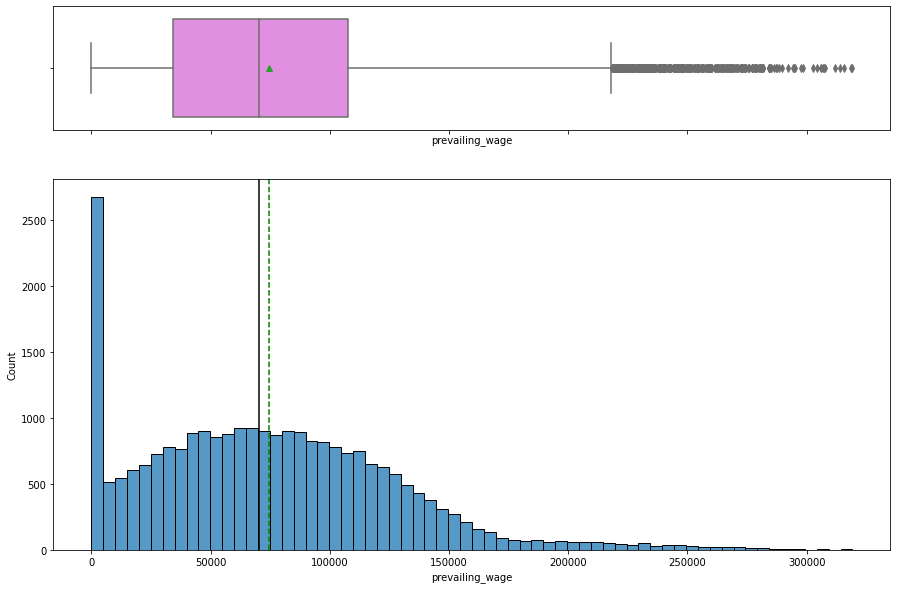%0A)

-   The average and median annual salary is approximately USD 70,000
    which seems accurate
-   The trend appears correct with outliers in the higher income bracket
    between USD 200,000 to USD 300,000
-   There are several very low salaries as well, which appears incorrect
    and requires further investigation

In \[23\]:

    # checking the observations which have less than 100 prevailing wage
    data.loc[data["prevailing_wage"] < 100, "unit_of_wage"]

Out\[23\]:

    338      Hour
    634      Hour
    839      Hour
    876      Hour
    995      Hour
             ... 
    25023    Hour
    25258    Hour
    25308    Hour
    25329    Hour
    25461    Hour
    Name: unit_of_wage, Length: 176, dtype: category
    Categories (4, object): ['Hour', 'Month', 'Week', 'Year']

In \[24\]:

    data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Out\[24\]:

    Hour     176
    Month      0
    Week       0
    Year       0
    Name: unit_of_wage, dtype: int64

In \[25\]:

    # function to create labeled barplots


    def labeled_barplot(data, feature, perc=False, n=None):
        """
        Barplot with percentage at the top

        data: dataframe
        feature: dataframe column
        perc: whether to display percentages instead of count (default is False)
        n: displays the top n category levels (default is None, i.e., display all levels)
        """

        total = len(data[feature])  # length of the column
        count = data[feature].nunique()
        if n is None:
            plt.figure(figsize=(count + 2, 6))
        else:
            plt.figure(figsize=(n + 2, 6))

        plt.xticks(rotation=90, fontsize=15)
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n],
        )

        for p in ax.patches:
            if perc == True:
                label = "{:.1f}%".format(
                    100 * p.get_height() / total
                )  # percentage of each class of the category
            else:
                label = p.get_height()  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = p.get_height()  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage

        plt.show()  # show the plot

#### Observations on continent<a href="#Observations-on-continent" class="anchor-link">¶</a>

In \[26\]:

    labeled_barplot(data, "continent", perc=True)

![](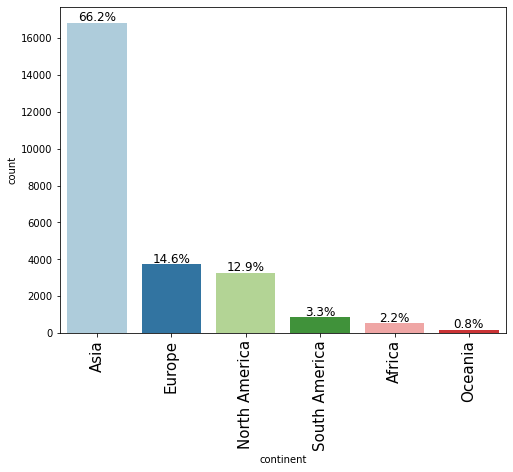%0A)

-   Majority of employees about 66.2% are from Asia followed by Europe
    and North America while Oceania is the least

#### Observations on education of employee<a href="#Observations-on-education-of-employee"
class="anchor-link">¶</a>

In \[27\]:

    labeled_barplot(data, "education_of_employee", perc=True)

![](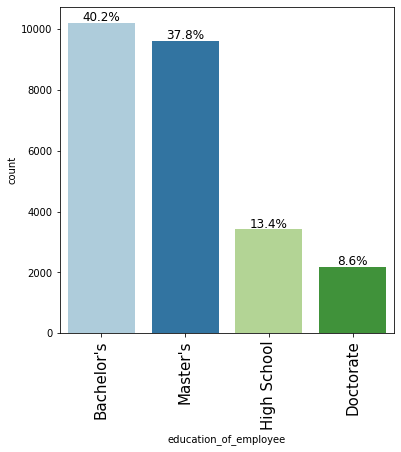%0A)

-   Majority of employees have either a bachelor's (40.2%) or a master's
    (37.8%) and minority of applicants have either a doctorate (8.6%) or
    only a high school diploma (13.4%)

#### Observations on job experience<a href="#Observations-on-job-experience" class="anchor-link">¶</a>

In \[28\]:

    labeled_barplot(data, "has_job_experience", perc=True)

![](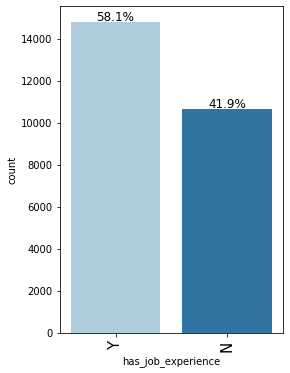%0A)

-   Around 58% employees have prior job experience and 42% employees do
    not

#### Observations on job training<a href="#Observations-on-job-training" class="anchor-link">¶</a>

In \[29\]:

    labeled_barplot(data, "requires_job_training", perc=True)

![](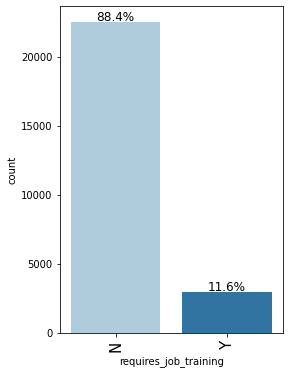%0A)

-   Majority do not require job training (88%). Although we observed
    that only 58% had prior job experience. It is possible that some
    occupations require employees with no prior job experience

#### Observations on region of employment<a href="#Observations-on-region-of-employment"
class="anchor-link">¶</a>

In \[30\]:

    labeled_barplot(data, "region_of_employment", perc=True)

![](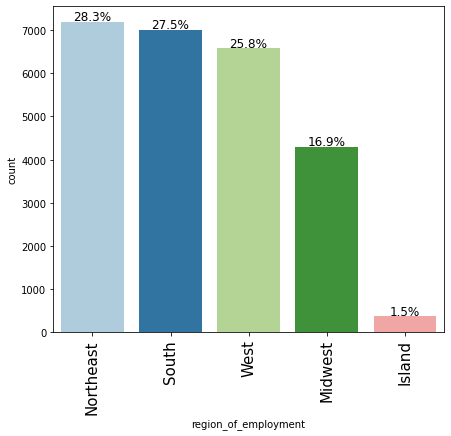%0A)

-   Northeast, South and West equally have employment opportunities with
    Human Resource shortages with 25-28% employees applying for visa
    approval to these regions, followed by Midwest (18%) and Island
    (1.5%)

#### Observations on unit of wage<a href="#Observations-on-unit-of-wage" class="anchor-link">¶</a>

In \[31\]:

    labeled_barplot(data, "unit_of_wage", perc=True)

![](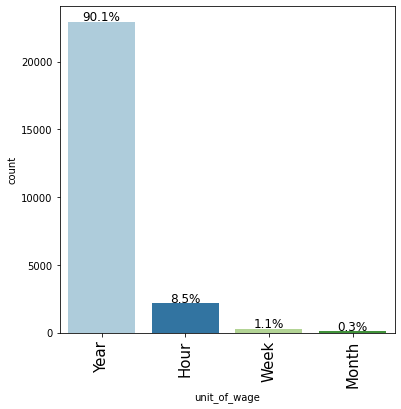%0A)

#### Observations on case status<a href="#Observations-on-case-status" class="anchor-link">¶</a>

In \[32\]:

    labeled_barplot(data, "case_status", perc=True)

![](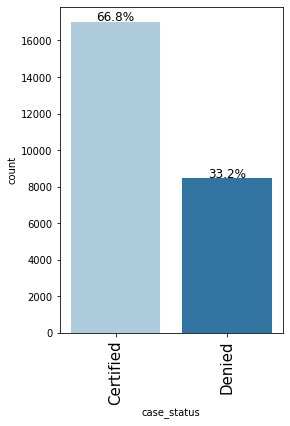%0A)

-   Approximately, 67% cases are approved and 33% cases are denied

### Bivariate Analysis<a href="#Bivariate-Analysis" class="anchor-link">¶</a>

In \[33\]:

    plt.figure(figsize=(10,5))
    sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
    plt.show()

![](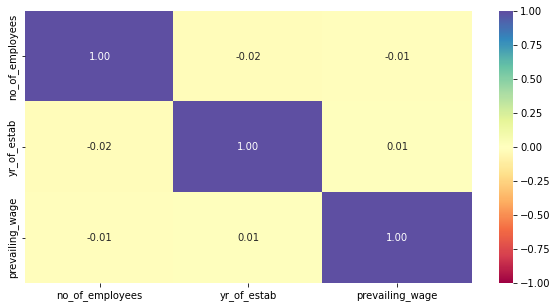%0A)

-   There is moderate negative correlation between no_of_employees and
    year of establishment and prevailing wage
-   There is slight positive correlation between year of establishment
    and prevailing wage

**Creating functions that will help us with further analysis.**

In \[34\]:

    ### function to plot distributions wrt target


    def distribution_plot_wrt_target(data, predictor, target):

        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        target_uniq = data[target].unique()

        axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color="teal",
            stat="density",
        )

        axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color="orange",
            stat="density",
        )

        axs[1, 0].set_title("Boxplot w.r.t target")
        sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

        axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
        sns.boxplot(
            data=data,
            x=target,
            y=predictor,
            ax=axs[1, 1],
            showfliers=False,
            palette="gist_rainbow",
        )

        plt.tight_layout()
        plt.show()

In \[35\]:

    def stacked_barplot(data, predictor, target):
        """
        Print the category counts and plot a stacked bar chart

        data: dataframe
        predictor: independent variable
        target: target variable
        """
        count = data[predictor].nunique()
        sorter = data[target].value_counts().index[-1]
        tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
            by=sorter, ascending=False
        )
        print(tab1)
        print("-" * 120)
        tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
            by=sorter, ascending=False
        )
        tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification<a
href="#Those-with-higher-education-may-want-to-travel-abroad-for-a-well-paid-job.-Let&#39;s-find-out-if-education-has-any-impact-on-visa-certification"
class="anchor-link">¶</a>

In \[36\]:

    stacked_barplot(data, "education_of_employee", "case_status")

    case_status            Certified  Denied    All
    education_of_employee                          
    All                        17001    8446  25447
    Bachelor's                  6362    3858  10220
    High School                 1164    2252   3416
    Master's                    7565    2057   9622
    Doctorate                   1910     279   2189
    ------------------------------------------------------------------------------------------------------------------------

![](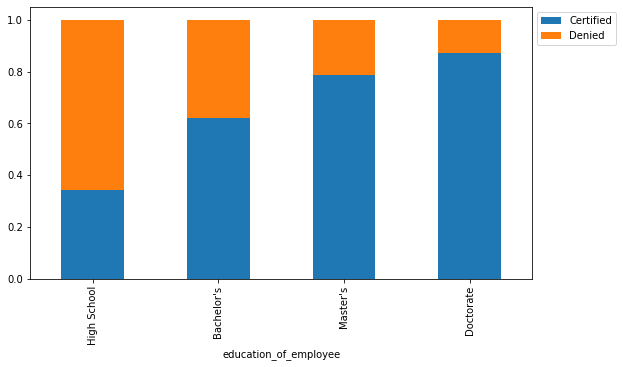%0A)

-   As expected the, the trend observed w.r.t % visa certification for
    education of employees is Doctorate \> Master's \> Bachelor's \>
    High School

#### Let's have a look at the percentage of visa certifications across each region<a
href="#Let&#39;s-have-a-look-at-the-percentage-of-visa-certifications-across-each-region"
class="anchor-link">¶</a>

In \[37\]:

    stacked_barplot(data, "region_of_employment", "case_status")

    case_status           Certified  Denied    All
    region_of_employment                          
    All                       17001    8446  25447
    Northeast                  4524    2665   7189
    West                       4097    2481   6578
    South                      4908    2098   7006
    Midwest                    3246    1053   4299
    Island                      226     149    375
    ------------------------------------------------------------------------------------------------------------------------

![](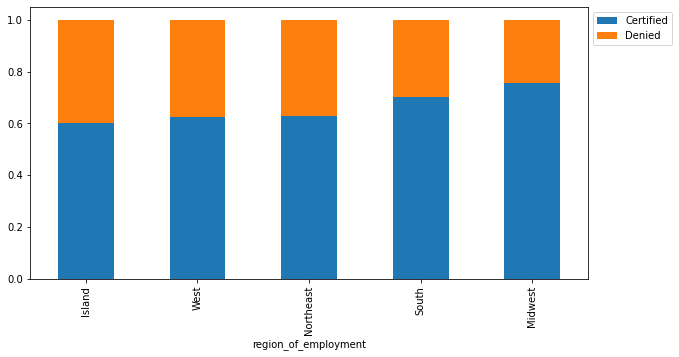%0A)

-   Trend observed w.r.t visa certifications for region_of_employment is
    MidWest \> South \> Northeast ~ West \> Island

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.<a
href="#Lets&#39;-similarly-check-for-the-continents-and-find-out-how-the-visa-status-vary-across-different-continents."
class="anchor-link">¶</a>

In \[38\]:

    stacked_barplot(data, "continent", "case_status")

    case_status    Certified  Denied    All
    continent                              
    All                17001    8446  25447
    Asia               11001    5839  16840
    North America       2037    1250   3287
    Europe              2953     774   3727
    South America        492     359    851
    Africa               396     154    550
    Oceania              122      70    192
    ------------------------------------------------------------------------------------------------------------------------

![](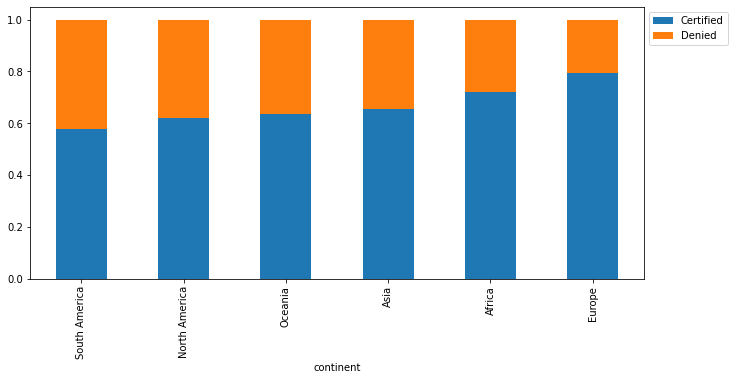%0A)

-   The trend observed w.r.t % certification for continents is Europe \>
    Africa \> Asia \> Oceania \> North America & South America
-   Irrespective of the continent the employee is from, more cases are
    certified than denied

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification<a
href="#Experienced-professionals-might-look-abroad-for-opportunities-to-improve-their-lifestyles-and-career-development.-Let&#39;s-see-if-having-work-experience-has-any-influence-over-visa-certification"
class="anchor-link">¶</a>

In \[39\]:

    stacked_barplot(data, "has_job_experience", "case_status")

    case_status         Certified  Denied    All
    has_job_experience                          
    All                     17001    8446  25447
    N                        5986    4675  10661
    Y                       11015    3771  14786
    ------------------------------------------------------------------------------------------------------------------------

![](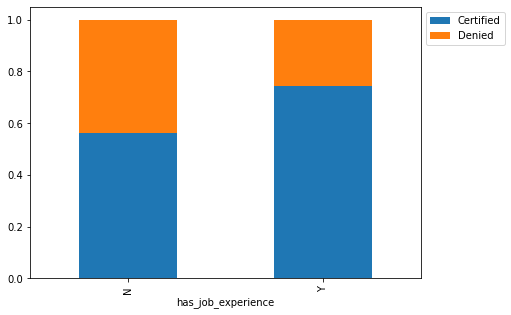%0A)

#### Do the employees who have prior work experience require any job training?<a
href="#Do-the-employees-who-have-prior-work-experience-require-any-job-training?"
class="anchor-link">¶</a>

In \[40\]:

    stacked_barplot(data, "has_job_experience", "requires_job_training")

    requires_job_training      N     Y    All
    has_job_experience                       
    All                    22498  2949  25447
    N                       8976  1685  10661
    Y                      13522  1264  14786
    ------------------------------------------------------------------------------------------------------------------------

![](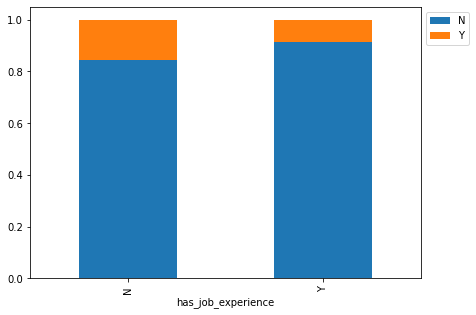%0A)

-   As expected, the trend observed w.r.t % visa certifications for
    has_job_experience is Yes \> No

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage<a
href="#The-US-government-has-established-a-prevailing-wage-to-protect-local-talent-and-foreign-workers.-Let&#39;s-analyze-the-data-and-see-if-the-visa-status-changes-with-the-prevailing-wage"
class="anchor-link">¶</a>

In \[41\]:

    distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

![](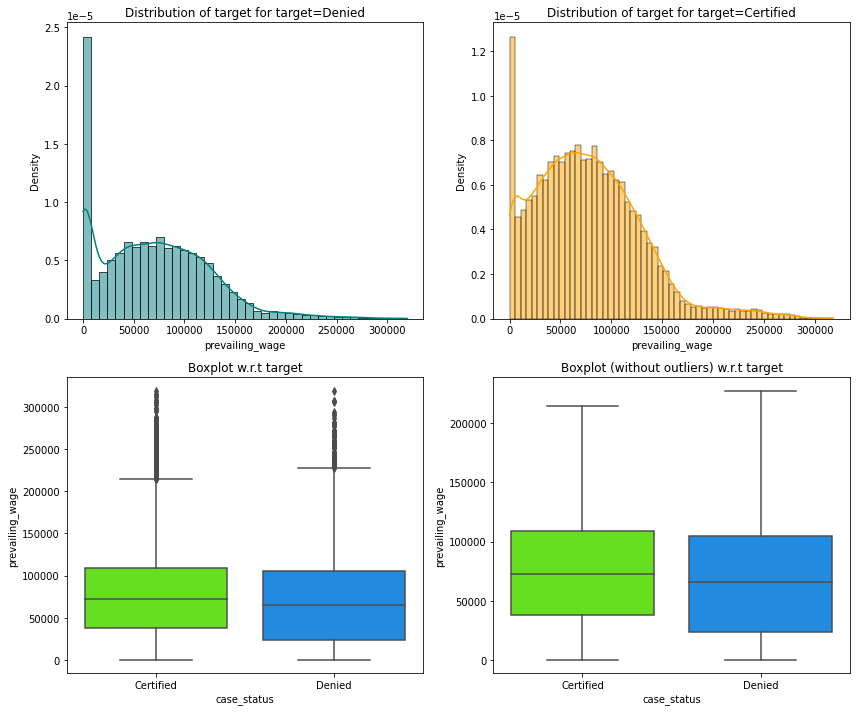%0A)

#### Checking if the prevailing wage is similar across all the regions of the US<a
href="#Checking-if-the-prevailing-wage-is-similar-across-all-the-regions-of-the-US"
class="anchor-link">¶</a>

In \[42\]:

    plt.figure(figsize=(10,5))
    sns.boxplot(data['region_of_employment'],data['prevailing_wage'])
    plt.show()

![](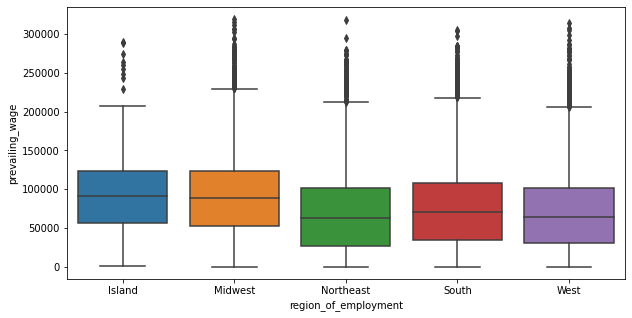%0A)

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.<a
href="#The-prevailing-wage-has-different-units-(Hourly,-Weekly,-etc).-Let&#39;s-find-out-if-it-has-any-impact-on-visa-applications-getting-certified."
class="anchor-link">¶</a>

In \[43\]:

    stacked_barplot(data, "unit_of_wage", "case_status")

    case_status   Certified  Denied    All
    unit_of_wage                          
    All               17001    8446  25447
    Year              16030    6903  22933
    Hour                747    1406   2153
    Week                169     103    272
    Month                55      34     89
    ------------------------------------------------------------------------------------------------------------------------

![](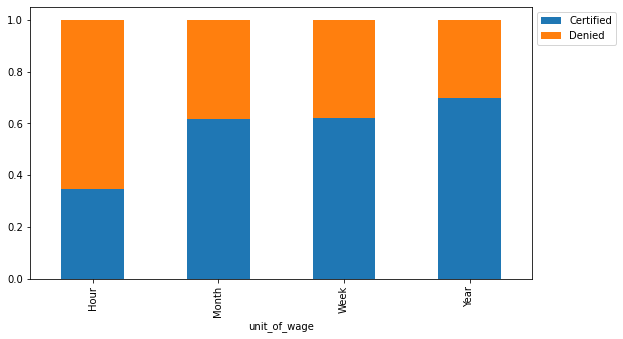%0A)

-   Employess that earn Hourly wage has higher rate of visa denial while
    those that earn in week, month or year has higher chance of approval

## Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

### Outlier Check<a href="#Outlier-Check" class="anchor-link">¶</a>

-   Let's check for outliers in the data.

In \[44\]:

    # outlier detection using boxplot
    numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


    plt.figure(figsize=(15, 12))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(6, 4, i + 1)
        plt.boxplot(data[variable], whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

![](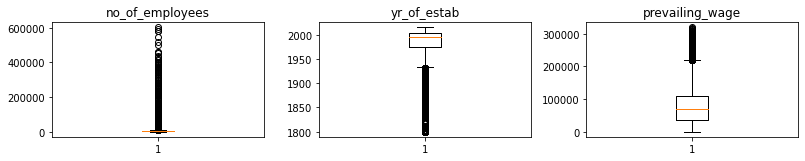%0A)

-   There are quite a few outliers in the data.
-   However, we will not treat them as they are proper values.

### Data Preparation for modeling<a href="#Data-Preparation-for-modeling" class="anchor-link">¶</a>

-   We want to predict which visa will be certified.
-   Before we proceed to build a model, we'll have to encode categorical
    features.
-   We'll split the data into train and test to be able to evaluate the
    model that we build on the train data.

In \[45\]:

    data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In \[46\]:

    # Separating features and the target column
    X = data.drop('case_status', axis=1)
    y = data['case_status']

In \[47\]:

    X = pd.get_dummies(X, drop_first=True)

In \[48\]:

    # Splitting the data into train and test sets in 70:30 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In \[49\]:

    print("Shape of Training set : ", X_train.shape)
    print("Shape of test set : ", X_test.shape)
    print("Percentage of classes in training set:")
    print(y_train.value_counts(normalize=True))
    print("Percentage of classes in test set:")
    print(y_test.value_counts(normalize=True))

    Shape of Training set :  (17812, 21)
    Shape of test set :  (7635, 21)
    Percentage of classes in training set:
    1    0.668089
    0    0.331911
    Name: case_status, dtype: float64
    Percentage of classes in test set:
    1    0.668107
    0    0.331893
    Name: case_status, dtype: float64

## Model evaluation criterion<a href="#Model-evaluation-criterion" class="anchor-link">¶</a>

### Model can make wrong predictions as:<a href="#Model-can-make-wrong-predictions-as:"
class="anchor-link">¶</a>

1.  Model predicts that the visa application will get certified but in
    reality, the visa application should get denied.
2.  Model predicts that the visa application will not get certified but
    in reality, the visa application should get certified.

### Which case is more important?<a href="#Which-case-is-more-important?" class="anchor-link">¶</a>

-   Both the cases are important as:

-   If a visa is certified when it had to be denied a wrong employee
    will get the job position while US citizens will miss the
    opportunity to work on that position.

-   If a visa is denied when it had to be certified the U.S. will lose a
    suitable human resource that can contribute to the economy.

### How to reduce the losses?<a href="#How-to-reduce-the-losses?" class="anchor-link">¶</a>

-   `F1 Score` can be used a the metric for evaluation of the model,
    greater the F1 score higher are the chances of minimizing False
    Negatives and False Positives.
-   We will use balanced class weights so that model focuses equally on
    both classes.

**First, let's create functions to calculate different metrics and
confusion matrix so that we don't have to use the same code repeatedly
for each model.**

-   The model_performance_classification_sklearn function will be used
    to check the model performance of models.
-   The confusion_matrix_sklearn function will be used to plot the
    confusion matrix.

In \[50\]:

    # defining a function to compute different metrics to check performance of a classification model built using sklearn


    def model_performance_classification_sklearn(model, predictors, target):
        """
        Function to compute different metrics to check classification model performance

        model: classifier
        predictors: independent variables
        target: dependent variable
        """

        # predicting using the independent variables
        pred = model.predict(predictors)

        acc = accuracy_score(target, pred)  # to compute Accuracy
        recall = recall_score(target, pred)  # to compute Recall
        precision = precision_score(target, pred)  # to compute Precision
        f1 = f1_score(target, pred)  # to compute F1-score

        # creating a dataframe of metrics
        df_perf = pd.DataFrame(
            {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
            index=[0],
        )

        return df_perf

In \[51\]:

    def confusion_matrix_sklearn(model, predictors, target):
        """
        To plot the confusion_matrix with percentages

        model: classifier
        predictors: independent variables
        target: dependent variable
        """
        y_pred = model.predict(predictors)
        cm = confusion_matrix(target, y_pred)
        labels = np.asarray(
            [
                ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                for item in cm.flatten()
            ]
        ).reshape(2, 2)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

### Decision Tree Model<a href="#Decision-Tree-Model" class="anchor-link">¶</a>

In \[52\]:

    #Fitting the model
    d_tree = DecisionTreeClassifier(random_state=1)
    d_tree.fit(X_train,y_train)

    #Calculating different metrics
    d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
    print("Training performance:\n",d_tree_model_train_perf)
    d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
    print("Testing performance:\n",d_tree_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(d_tree,X_test,y_test)

    Training performance:
        Accuracy  Recall  Precision   F1
    0       1.0     1.0        1.0  1.0
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.657367  0.735934   0.747362  0.741604

![](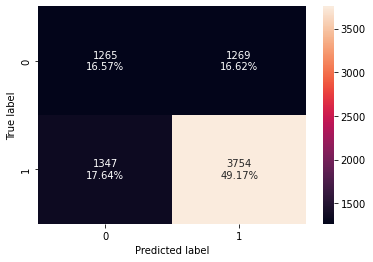%0A)

-   The decision tree is overfitting the training data. Training metrics
    are high but the testing metrics are not. F1_score for the test set
    is only 0.74. We can improve model performance by hyperparameter
    tuning

### Decision Tree - Hyperparameter tuning<a href="#Decision-Tree---Hyperparameter-tuning"
class="anchor-link">¶</a>

In \[53\]:

    #Choose the type of classifier. 
    dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

    # Grid of parameters to choose from
    parameters = {'max_depth': np.arange(2,30), 
                  'min_samples_leaf': [1, 2, 5, 7, 10],
                  'max_leaf_nodes' : [2, 3, 5, 10,15],
                  'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
                 }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    dtree_estimator = grid_obj.best_estimator_

    # Fit the best algorithm to the data. 
    dtree_estimator.fit(X_train, y_train)

Out\[53\]:

    DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                           max_leaf_nodes=2, min_impurity_decrease=0.0001,
                           random_state=1)

In \[54\]:

    #Calculating different metrics
    dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
    print("Training performance:\n",dtree_estimator_model_train_perf)
    dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
    print("Testing performance:\n",dtree_estimator_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.711599  0.932605   0.719108  0.812059
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.709103  0.929034   0.718248  0.810155

![](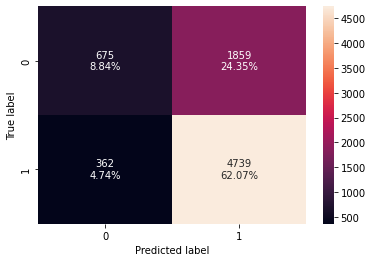%0A)

-   The hyperparameter tuned decision tree is not overfiting the
    dataset, as well the F1 score has improved. F1 score for both the
    train and test datasets are 0.812 & 0.810 respectively

### Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

In \[55\]:

    #Fitting the model
    rf_estimator = RandomForestClassifier(random_state=1)
    rf_estimator.fit(X_train,y_train)

    #Calculating different metrics
    rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
    print("Training performance:\n",rf_estimator_model_train_perf)
    rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
    print("Testing performance:\n",rf_estimator_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(rf_estimator,X_test,y_test)

    Training performance:
        Accuracy  Recall  Precision   F1
    0       1.0     1.0        1.0  1.0
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.721022  0.832974   0.768771  0.799586

![](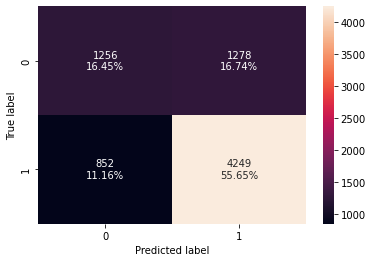%0A)

-   Random forest model is also overfitting the training data

### Random Forest - Hyperparameter tuning<a href="#Random-Forest---Hyperparameter-tuning"
class="anchor-link">¶</a>

In \[56\]:

    # Choose the type of classifier. 
    rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)

    parameters = {  
                    'max_depth': list(np.arange(10,30,10)) + [None],
                    'max_features': ['sqrt',None],
                    'min_samples_leaf': np.arange(5,15,5),
                    'min_samples_split': np.arange(5, 20, 5),
                    'n_estimators': np.arange(20,120,40)}


    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    rf_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data. 
    rf_tuned.fit(X_train, y_train)

Out\[56\]:

    RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_features=None,
                           min_samples_leaf=5, min_samples_split=5, oob_score=True,
                           random_state=1)

In \[57\]:

    #Calculating different metrics
    rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
    print("Training performance:\n",rf_tuned_model_train_perf)
    rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
    print("Testing performance:\n",rf_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(rf_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.895857  0.899076   0.942394  0.920225
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.724427  0.790433   0.795737  0.793076

![](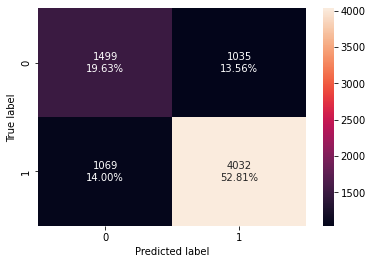%0A)

-   Hyperparameter tuning has decreased the overfit and increased F1
    score, however, this model is not performing as optimally as the
    hyperparameter tuned decision tree

### Bagging Classifier<a href="#Bagging-Classifier" class="anchor-link">¶</a>

In \[58\]:

    #Fitting the model
    bagging_classifier = BaggingClassifier(random_state=1)
    bagging_classifier.fit(X_train,y_train)

    #Calculating different metrics
    bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
    print("Training performance:\n", bagging_classifier_model_train_perf)
    bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
    print("Testing performance:\n", bagging_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.984673  0.985882    0.99113  0.988499
    Testing performance:
        Accuracy    Recall  Precision       F1
    0  0.701244  0.779259   0.774854  0.77705

![](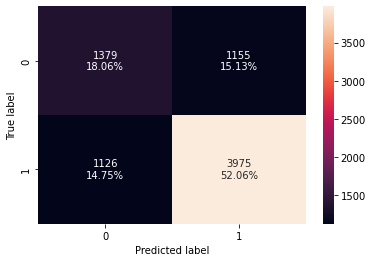%0A)

-   Bagging classifier is also overfiting the training data

### Bagging - Hyperparameter Tuning<a href="#Bagging---Hyperparameter-Tuning" class="anchor-link">¶</a>

In \[59\]:

    # Choose the type of classifier. 
    bagging_estimator_tuned = BaggingClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {'max_samples': [0.7,0.8,0.9,1], 
                  'max_features': [0.7,0.8,0.9,1],
                  'n_estimators' : [10,20,30,40,50],
                 }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    bagging_estimator_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    bagging_estimator_tuned.fit(X_train, y_train)

Out\[59\]:

    BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                      random_state=1)

In \[60\]:

    #Calculating different metrics
    bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
    print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
    bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
    print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.989894  0.999412   0.985662  0.992489
    Testing performance:
        Accuracy    Recall  Precision        F1
    0    0.7222  0.887865   0.745146  0.810269

![](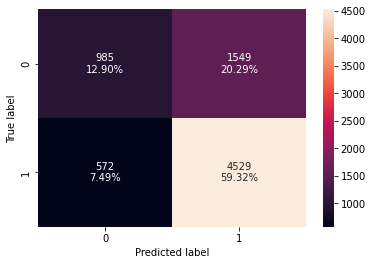%0A)

-   The model is still found to overfit the training data, as the
    training metrics are high but the testing metrics are not

### AdaBoost Classifier<a href="#AdaBoost-Classifier" class="anchor-link">¶</a>

In \[61\]:

    #Fitting the model
    ab_classifier = AdaBoostClassifier(random_state=1)
    ab_classifier.fit(X_train,y_train)

    #Calculating different metrics
    ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
    print("Training performance:\n", ab_classifier_model_train_perf)
    ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
    print("Testing performance:\n", ab_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(ab_classifier,X_test,y_test)

    Training performance:
        Accuracy   Recall  Precision        F1
    0  0.740568  0.89084   0.761402  0.821051
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.733857  0.877475   0.760836  0.815004

![](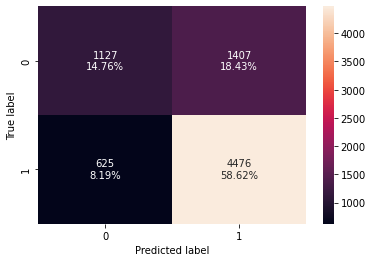%0A)

-   Unlike the decision tree, random forest, or the bagging classifier;
    the AdaBoost classifier is not found to overfit the training data.
    It is giving a generalized performance on the training & testing
    data with a F1 score 0.821 & 0.815 respectively

### AdaBoost - Hyperparamter tuning<a href="#AdaBoost---Hyperparamter-tuning" class="anchor-link">¶</a>

In \[62\]:

    # Choose the type of classifier. 
    abc_tuned = AdaBoostClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {
        #Let's try different max_depth for base_estimator
        "base_estimator":[DecisionTreeClassifier(max_depth=1),
                          DecisionTreeClassifier(max_depth=2)],
        "n_estimators": np.arange(20,120,40),
        "learning_rate":np.arange(0.2,2,0.6)
    }

    # Type of scoring used to compare parameter  combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    abc_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    abc_tuned.fit(X_train, y_train)

Out\[62\]:

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                       learning_rate=0.2, n_estimators=60, random_state=1)

In \[63\]:

    #Calculating different metrics
    abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
    print("Training performance:\n", abc_tuned_model_train_perf)
    abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
    print("Testing performance:\n", abc_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(abc_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.750337  0.877143   0.777621  0.824389
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.743026  0.862772    0.77715  0.817726

![](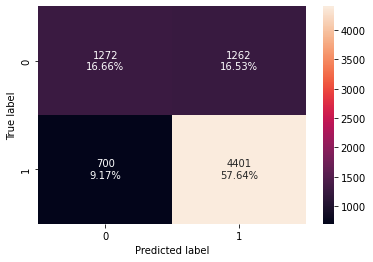%0A)

-   The hyperparameter tuned model is giving similar performance to the
    default AdaBoost model

### Gradient Boosting Classifier<a href="#Gradient-Boosting-Classifier" class="anchor-link">¶</a>

In \[64\]:

    #Fitting the model
    gb_classifier = GradientBoostingClassifier(random_state=1)
    gb_classifier.fit(X_train,y_train)

    #Calculating different metrics
    gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
    print("Training performance:\n",gb_classifier_model_train_perf)
    gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
    print("Testing performance:\n",gb_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(gb_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.757242  0.880504   0.783109  0.828956
    Testing performance:
        Accuracy    Recall  Precision       F1
    0   0.74761  0.867869   0.779401  0.82126

![](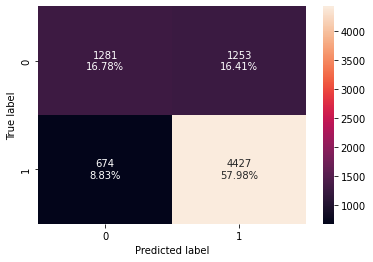%0A)

-   The gradient boosting model is giving generalized performance on
    both the training and testing data with very high F1 scores of 0.829
    and 0.821 respectively

### Gradient Boosting - Hyperparameter Tuning<a href="#Gradient-Boosting---Hyperparameter-Tuning"
class="anchor-link">¶</a>

In \[65\]:

    # Choose the type of classifier. 
    gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

    # Grid of parameters to choose from
    parameters = {
        "n_estimators": [100,175,250],
        "subsample":[0.8,1],
        "max_features":[0.8,0.9,1]
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    gbc_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    gbc_tuned.fit(X_train, y_train)

Out\[65\]:

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               max_features=0.9, random_state=1, subsample=0.8)

In \[66\]:

    #Calculating different metrics
    gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
    print("Training performance:\n",gbc_tuned_model_train_perf)
    gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
    print("Testing performance:\n",gbc_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.757804  0.879496   0.784205  0.829121
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.748265  0.866497   0.780781  0.821409

![](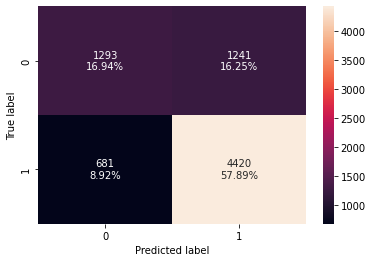%0A)

-   There is not much difference in the model performance after
    hyperparameter tuning

### XGBoost Classifier<a href="#XGBoost-Classifier" class="anchor-link">¶</a>

In \[67\]:

    #Fitting the model
    xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
    xgb_classifier.fit(X_train,y_train)

    #Calculating different metrics
    xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
    print("Training performance:\n",xgb_classifier_model_train_perf)
    xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
    print("Testing performance:\n",xgb_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.757074  0.881429   0.782469  0.829006
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.747479  0.868457    0.77897  0.821283

![](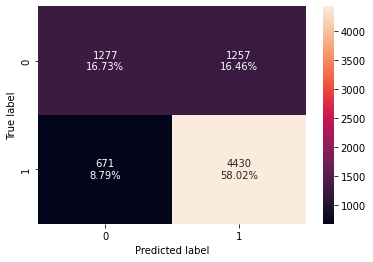%0A)

-   The XGBoost classifier generalized well on the training data with
    slight overfitting

### XGBoost - Hyperparameter tuning<a href="#XGBoost---Hyperparameter-tuning" class="anchor-link">¶</a>

In \[68\]:

    # Choose the type of classifier. 
    xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

    # Grid of parameters to choose from
    parameters = {
        "n_estimators": [10,30,50],
        "scale_pos_weight":[1,2,5],
        "subsample":[0.7,0.9,1],
        "learning_rate":[0.05, 0.1,0.2],
        "colsample_bytree":[0.7,0.9,1],
        "colsample_bylevel":[0.5,0.7,1]
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    xgb_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    xgb_tuned.fit(X_train, y_train)

Out\[68\]:

    XGBClassifier(eval_metric='logloss', learning_rate=0.2, n_estimators=30,
                  random_state=1, subsample=0.9)

In \[69\]:

    #Calculating different metrics
    xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
    print("Training performance:\n",xgb_tuned_model_train_perf)
    xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
    print("Testing performance:\n",xgb_tuned_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.753593  0.879244   0.779948  0.826625
    Testing performance:
        Accuracy    Recall  Precision        F1
    0    0.7463  0.868065   0.777934  0.820532

![](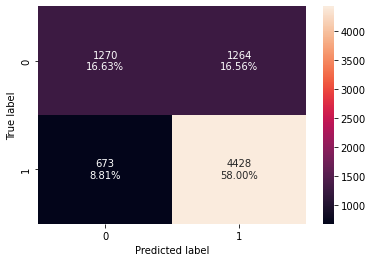%0A)

-   The overfitting has reduced & the model is giving generalized
    performance on both training & testing data. F1 scores are high with
    0.827 and 0.821 for the training & testing datasets

### Stacking Classifier<a href="#Stacking-Classifier" class="anchor-link">¶</a>

In \[70\]:

    estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

    final_estimator = xgb_tuned

    stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

    stacking_classifier.fit(X_train,y_train)

Out\[70\]:

    StackingClassifier(estimators=[('Ad Boost Tuned',
                                    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                       learning_rate=0.2,
                                                       n_estimators=60,
                                                       random_state=1)),
                                   ('Gradient Boost Tuned',
                                    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                               max_features=0.9,
                                                               random_state=1,
                                                               subsample=0.8)),
                                   ('Decision Tree Tuned',
                                    DecisionTreeClassifier(class_weight={0: 0.668,
                                                                         1: 0.332},
                                                           max_depth=2,
                                                           max_leaf_nodes=2,
                                                           min_impurity_decrease=0.0001,
                                                           random_state=1))],
                       final_estimator=XGBClassifier(eval_metric='logloss',
                                                     learning_rate=0.2,
                                                     n_estimators=30,
                                                     random_state=1,
                                                     subsample=0.9))

In \[71\]:

    #Calculating different metrics
    stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
    print("Training performance:\n",stacking_classifier_model_train_perf)
    stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
    print("Testing performance:\n",stacking_classifier_model_test_perf)

    #Creating confusion matrix
    confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

    Training performance:
        Accuracy    Recall  Precision        F1
    0  0.757411  0.880504   0.783285  0.829054
    Testing performance:
        Accuracy    Recall  Precision        F1
    0  0.748788  0.868261   0.780441  0.822012

![](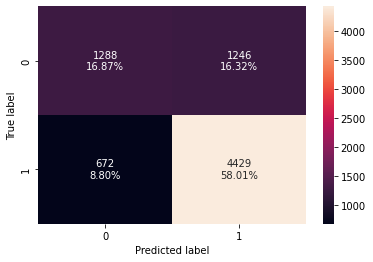%0A)

-   The metrics are similar to what has been observed with other models
    post hyperparameter tuning. The model is not overfitting & gives
    generalized performance with training & testing F1 scores of 0.829 &
    0.822
-   The model is able to identify the majority of cases that should be
    certified correctlly, but not as many cases that should be denied
    correctly

## Model Performance Comparison and Final Model Selection<a href="#Model-Performance-Comparison-and-Final-Model-Selection"
class="anchor-link">¶</a>

In \[72\]:

    # training performance comparison

    models_train_comp_df = pd.concat(
        [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
         bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
         abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
        axis=1,
    )
    models_train_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Tuned",
        "Random Forest",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adabosst Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "XGBoost Classifier",
        "XGBoost Classifier Tuned",
        "Stacking Classifier"]
    print("Training performance comparison:")
    models_train_comp_df

    Training performance comparison:

Out\[72\]:

|  | Decision Tree | Decision Tree Tuned | Random Forest | Random Forest Tuned | Bagging Classifier | Bagging Estimator Tuned | Adaboost Classifier | Adabosst Classifier Tuned | Gradient Boost Classifier | Gradient Boost Classifier Tuned | XGBoost Classifier | XGBoost Classifier Tuned | Stacking Classifier |
|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Accuracy | 1.0 | 0.711599 | 1.0 | 0.895857 | 0.984673 | 0.989894 | 0.740568 | 0.750337 | 0.757242 | 0.757804 | 0.757074 | 0.753593 | 0.757411 |
| Recall | 1.0 | 0.932605 | 1.0 | 0.899076 | 0.985882 | 0.999412 | 0.890840 | 0.877143 | 0.880504 | 0.879496 | 0.881429 | 0.879244 | 0.880504 |
| Precision | 1.0 | 0.719108 | 1.0 | 0.942394 | 0.991130 | 0.985662 | 0.761402 | 0.777621 | 0.783109 | 0.784205 | 0.782469 | 0.779948 | 0.783285 |
| F1 | 1.0 | 0.812059 | 1.0 | 0.920225 | 0.988499 | 0.992489 | 0.821051 | 0.824389 | 0.828956 | 0.829121 | 0.829006 | 0.826625 | 0.829054 |



In \[73\]:

    # testing performance comparison

    models_test_comp_df = pd.concat(
        [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
         bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
         abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
        axis=1,
    )
    models_test_comp_df.columns = [
        "Decision Tree",
        "Decision Tree Tuned",
        "Random Forest",
        "Random Forest Tuned",
        "Bagging Classifier",
        "Bagging Estimator Tuned",
        "Adaboost Classifier",
        "Adabosst Classifier Tuned",
        "Gradient Boost Classifier",
        "Gradient Boost Classifier Tuned",
        "XGBoost Classifier",
        "XGBoost Classifier Tuned",
        "Stacking Classifier"]
    print("Testing performance comparison:")
    models_test_comp_df

    Testing performance comparison:

Out\[73\]:

|  | Decision Tree | Decision Tree Tuned | Random Forest | Random Forest Tuned | Bagging Classifier | Bagging Estimator Tuned | Adaboost Classifier | Adabosst Classifier Tuned | Gradient Boost Classifier | Gradient Boost Classifier Tuned | XGBoost Classifier | XGBoost Classifier Tuned | Stacking Classifier |
|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Accuracy | 0.657367 | 0.709103 | 0.721022 | 0.724427 | 0.701244 | 0.722200 | 0.733857 | 0.743026 | 0.747610 | 0.748265 | 0.747479 | 0.746300 | 0.748788 |
| Recall | 0.735934 | 0.929034 | 0.832974 | 0.790433 | 0.779259 | 0.887865 | 0.877475 | 0.862772 | 0.867869 | 0.866497 | 0.868457 | 0.868065 | 0.868261 |
| Precision | 0.747362 | 0.718248 | 0.768771 | 0.795737 | 0.774854 | 0.745146 | 0.760836 | 0.777150 | 0.779401 | 0.780781 | 0.778970 | 0.777934 | 0.780441 |
| F1 | 0.741604 | 0.810155 | 0.799586 | 0.793076 | 0.777050 | 0.810269 | 0.815004 | 0.817726 | 0.821260 | 0.821409 | 0.821283 | 0.820532 | 0.822012 |



-   Decision tree, Random forest (default & tuned), Bagging classifier
    (default & tuned) & XGBoost were found to overfit the training
    dataset
-   Decision tree tuned, Adaboost (default & tuned), Gradient boost
    (default & tuned) and XGBoost (tuned) were found to give generalized
    performance on the training & testing data sets. Of these, the
    XGBoost (tuned) has the highest F1 score (although all models have
    more or less similar performance)

### Feature importance of XGBoost Hyperparameter Tuned Model<a href="#Feature-importance-of-XGBoost-Hyperparameter-Tuned-Model"
class="anchor-link">¶</a>

In \[74\]:

    feature_names = X_train.columns
    importances = xgb_tuned.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

![](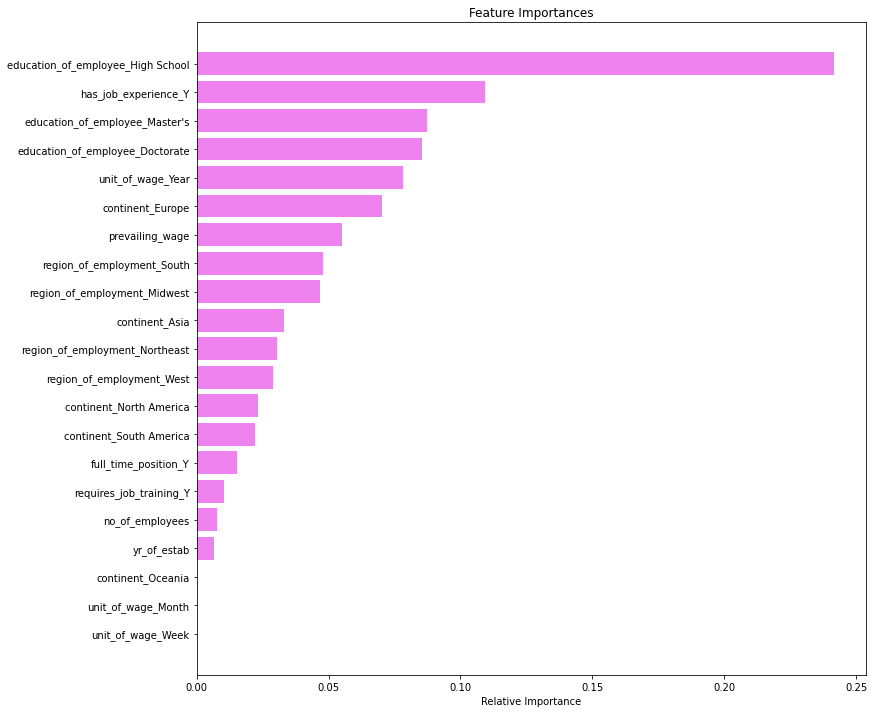%0A)

-   The findings from the optimized model is similar to what was
    observed post EDA
-   Education of the employee was found to be the most important
    attribute having an influence on visa certifications. Other
    important attributes found were - if an employee has prior job
    experience, unit_of_wage, continent of the employee, & region of
    employment in the US

## Actionable Insights and Recommendations<a href="#Actionable-Insights-and-Recommendations"
class="anchor-link">¶</a>

#### Insights<a href="#Insights" class="anchor-link">¶</a>

-   Based on the EDA and the XGBoost(tuned) model, the following
    features were identified as important for visas getting certified
    than denied
    -   **(1) Employee Education Level:** an employee with only a high
        school certififcation has over 65% chance of visa getting denied
        in comparison to an employee with a doctorate degree with over a
        85% chance of visa getting certified
    -   **(2) Prevailing Wage**: The higher the prevailing wage of the
        job an applicant is applying for, the more likely the
        application will be approved. This is especially true for
        applications for jobs with an hourly unit of wage.
    -   **(3) Employee Originating Continent:** The continent the
        employee is from (e.g., if Europe, over 80% chance of visa
        getting certified), if the employee has prior job experience
        (over 75% chance of visa getting approved if an employee has
        prior work experience but 50% chance of visa getting denied if
        an employee has no work experience) are other important
        attributes
    -   **(4) Employee Prior Job Experience:** An applicant applying for
        a job without any previous job experience is more likley to be
        denied than an applicant for a job with experience
    -   **(5) US Employement Region:** the region of the US the
        employment opportunity is in is also an important deciding
        factor with over 70% cases getting certified if the region is
        Midwest or South

#### Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

-   The XGBoost hyperparameter tuned ML model is able to give
    generalized prediction on training & testing datasets (not prone to
    overfitting) and is able to explain over 80% of information
    (accuracy of 75% on test dataset & F1 score of 82% on test dataset).
    -   The precision & recall are likewise both high (77% & 88%
        respectively)
    -   The confusion matrix is able to identify a higher % of cases
        getting certified, but only a smaller % of cases getting denied
        correctly. This limitation has to be borne in mind, and perhaps
        a reevaluation of cases getting denied can be carried out in
        case there is a a prevailing human resource shortage in the US.
        The model is still helpful, as only a small subset of data will
        need further re-evaluation which significantly decreases time
        spent in the process

#### Recommendations<a href="#Recommendations" class="anchor-link">¶</a>

-   The following measures can be taken by OFLC in order to prioritize
    limited resources towards screening a batch of applications for
    those most likely to be approved:
    -   Applicantions should be be sort by level of education and the
        higher levels of education should be reviewd first.
    -   Applicantions should also be be sort by previous job experience
        and review those with experience should be reviewed first.
    -   Applications can also be grouped based on unit of wage of
        applicants into hourly and annual wage, then review applications
        for salaried jobs first from highest to lowest wage.